In [10]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import finvizfinance 
import finvizfinance.screener 
from finvizfinance.quote import finvizfinance
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline

In [11]:
# Input tickers you want to obtain news for
ticker_one = 'AAPL'
ticker_two = 'MSFT'
ticker_three = 'NVDA'

In [12]:
# Obtain news for the desired number of tickers in a dataframe (i tried iterating through tickers, however I prefer this output at the expense of longer code since it is better organized and pulls max number of latest news per ticker (100))

stock_one = finvizfinance(ticker_one)
news_one = stock_one.TickerNews()

stock_two = finvizfinance(ticker_two)
news_two = stock_two.TickerNews()

stock_three = finvizfinance(ticker_three)
news_three = stock_three.TickerNews()

In [13]:
news_one['Ticker'] = ticker_one
news_one.head()
news_one['Date']= pd.to_datetime(news_one['Date'])
news_one

,Date,Title,Link,Ticker
0,2021-04-13 10:30:00,4 Dow Jones Stocks To Buy And Watch In April 2...,https://www.investors.com/research/dow-jones-s...,AAPL
1,2021-04-13 10:06:00,Will Tesla Be the Next Apple? Heres How Invest...,https://www.barrons.com/articles/will-tesla-be...,AAPL
2,2021-04-13 10:00:00,"Dow Jones Lags, Nasdaq Rallies As J&J Vaccine ...",https://www.investors.com/market-trend/stock-m...,AAPL
3,2021-04-13 09:48:00,Oops! Siri Prematurely Reveals the Date of App...,https://www.fool.com/investing/2021/04/13/oops...,AAPL
4,2021-04-13 09:00:00,Microsoft is updating its MacBook Air competit...,https://finance.yahoo.com/news/microsoft-surfa...,AAPL
...,...,...,...,...
95,2021-04-08 05:52:00,"MacBook, iPad production delayed as supply cru...",https://finance.yahoo.com/news/macbook-ipad-pr...,AAPL
96,2021-04-08 04:50:00,Oxford scientists behind COVID-19 vaccine set ...,https://finance.yahoo.com/news/covid-19-corona...,AAPL
97,2021-04-08 04:00:00,"UPDATE 1-MacBook, iPad production delayed as s...",https://finance.yahoo.com/news/1-macbook-ipad-...,AAPL
98,2021-04-08 03:16:00,"MacBook, iPad production delayed as supply cru...",https://finance.yahoo.com/news/macbook-ipad-pr...,AAPL


In [14]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Iterate through the headlines and get the polarity scores using vader
scores_one = news_one['Title'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_one = pd.DataFrame(scores_one)
scores_one.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.821,0.179,0.3400
2,0.135,0.865,0.000,-0.3612
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000


In [15]:
news_two['Ticker'] = ticker_two
news_two.head()

,Date,Title,Link,Ticker
0,2021-04-13 09:00:00,Microsoft is updating its MacBook Air competit...,https://finance.yahoo.com/news/microsoft-surfa...,MSFT
1,2021-04-13 07:30:00,"Nancy Pelosis Husband Bought Roblox, Microsoft...",https://www.barrons.com/articles/nancy-pelosi-...,MSFT
2,2021-04-13 07:00:00,Microsoft's $20 Billion Bet on Nuance,https://www.fool.com/investing/2021/04/13/micr...,MSFT
3,2021-04-13 06:00:00,Biden Hears 310 Companies Urge Speed on Climat...,https://finance.yahoo.com/news/biden-hears-310...,MSFT
4,2021-04-13 03:14:00,"J&J, Nvidia, Bitcoin, GameStop - 5 Things You ...",https://www.thestreet.com/markets/5-things-you...,MSFT


In [16]:
# Iterate through the headlines and get the polarity scores using vader
scores_two = news_two['Title'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_two = pd.DataFrame(scores_two)
scores_two.head()

,neg,neu,pos,compound
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [17]:
news_three['Ticker'] = ticker_three
news_three.head()

,Date,Title,Link,Ticker
0,2021-04-13 10:15:00,"Dow Jones Slides, Tech Stocks Rally As FDA Cal...",https://www.investors.com/market-trend/stock-m...,NVDA
1,2021-04-13 10:00:00,"Dow Jones Lags, Nasdaq Rallies As J&J Vaccine ...",https://www.investors.com/market-trend/stock-m...,NVDA
2,2021-04-13 10:00:00,3 Reasons to Buy NVIDIA After Its Investor Pre...,https://www.fool.com/investing/2021/04/13/3-re...,NVDA
3,2021-04-13 09:54:00,"Company News for Apr 13, 2021",https://finance.yahoo.com/news/company-news-ap...,NVDA
4,2021-04-13 09:42:00,"Nvidia Stock Hits Buy Point On Data Center, AI...",https://www.investors.com/news/technology/nvid...,NVDA


In [18]:
# Iterate through the headlines and get the polarity scores using vader
scores_three = news_three['Title'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_three = pd.DataFrame(scores_three)
scores_three.head()

,neg,neu,pos,compound
0,0.000,1.000,0.0,0.0000
1,0.135,0.865,0.0,-0.3612
2,0.000,1.000,0.0,0.0000
3,0.000,1.000,0.0,0.0000
4,0.000,1.000,0.0,0.0000


In [19]:
sentiment_one = pd.concat([news_one, scores_one], join='inner', axis=1)
sentiment_one.head()
sentiment_one

,Date,Title,Link,Ticker,neg,neu,pos,compound
0,2021-04-13 10:30:00,4 Dow Jones Stocks To Buy And Watch In April 2...,https://www.investors.com/research/dow-jones-s...,AAPL,0.000,1.000,0.000,0.0000
1,2021-04-13 10:06:00,Will Tesla Be the Next Apple? Heres How Invest...,https://www.barrons.com/articles/will-tesla-be...,AAPL,0.000,0.821,0.179,0.3400
2,2021-04-13 10:00:00,"Dow Jones Lags, Nasdaq Rallies As J&J Vaccine ...",https://www.investors.com/market-trend/stock-m...,AAPL,0.135,0.865,0.000,-0.3612
3,2021-04-13 09:48:00,Oops! Siri Prematurely Reveals the Date of App...,https://www.fool.com/investing/2021/04/13/oops...,AAPL,0.000,1.000,0.000,0.0000
4,2021-04-13 09:00:00,Microsoft is updating its MacBook Air competit...,https://finance.yahoo.com/news/microsoft-surfa...,AAPL,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
95,2021-04-08 05:52:00,"MacBook, iPad production delayed as supply cru...",https://finance.yahoo.com/news/macbook-ipad-pr...,AAPL,0.174,0.826,0.000,-0.2263
96,2021-04-08 04:50:00,Oxford scientists behind COVID-19 vaccine set ...,https://finance.yahoo.com/news/covid-19-corona...,AAPL,0.000,1.000,0.000,0.0000
97,2021-04-08 04:00:00,"UPDATE 1-MacBook, iPad production delayed as s...",https://finance.yahoo.com/news/1-macbook-ipad-...,AAPL,0.160,0.840,0.000,-0.2263
98,2021-04-08 03:16:00,"MacBook, iPad production delayed as supply cru...",https://finance.yahoo.com/news/macbook-ipad-pr...,AAPL,0.174,0.826,0.000,-0.2263


In [20]:
sentiment_two = pd.concat([news_two, scores_two], join='inner', axis=1)
sentiment_two.head()

,Date,Title,Link,Ticker,neg,neu,pos,compound
0,2021-04-13 09:00:00,Microsoft is updating its MacBook Air competit...,https://finance.yahoo.com/news/microsoft-surfa...,MSFT,0.0,1.0,0.0,0.0
1,2021-04-13 07:30:00,"Nancy Pelosis Husband Bought Roblox, Microsoft...",https://www.barrons.com/articles/nancy-pelosi-...,MSFT,0.0,1.0,0.0,0.0
2,2021-04-13 07:00:00,Microsoft's $20 Billion Bet on Nuance,https://www.fool.com/investing/2021/04/13/micr...,MSFT,0.0,1.0,0.0,0.0
3,2021-04-13 06:00:00,Biden Hears 310 Companies Urge Speed on Climat...,https://finance.yahoo.com/news/biden-hears-310...,MSFT,0.0,1.0,0.0,0.0
4,2021-04-13 03:14:00,"J&J, Nvidia, Bitcoin, GameStop - 5 Things You ...",https://www.thestreet.com/markets/5-things-you...,MSFT,0.0,1.0,0.0,0.0


In [21]:
sentiment_three = pd.concat([news_three, scores_three], join='inner', axis=1)
sentiment_three.head()

,Date,Title,Link,Ticker,neg,neu,pos,compound
0,2021-04-13 10:15:00,"Dow Jones Slides, Tech Stocks Rally As FDA Cal...",https://www.investors.com/market-trend/stock-m...,NVDA,0.000,1.000,0.0,0.0000
1,2021-04-13 10:00:00,"Dow Jones Lags, Nasdaq Rallies As J&J Vaccine ...",https://www.investors.com/market-trend/stock-m...,NVDA,0.135,0.865,0.0,-0.3612
2,2021-04-13 10:00:00,3 Reasons to Buy NVIDIA After Its Investor Pre...,https://www.fool.com/investing/2021/04/13/3-re...,NVDA,0.000,1.000,0.0,0.0000
3,2021-04-13 09:54:00,"Company News for Apr 13, 2021",https://finance.yahoo.com/news/company-news-ap...,NVDA,0.000,1.000,0.0,0.0000
4,2021-04-13 09:42:00,"Nvidia Stock Hits Buy Point On Data Center, AI...",https://www.investors.com/news/technology/nvid...,NVDA,0.000,1.000,0.0,0.0000


In [22]:
sentiment_one.describe()

,neg,neu,pos,compound
count,100.00000,100.000000,100.000000,100.000000
mean,0.04799,0.861060,0.090950,0.062542
std,0.08793,0.155104,0.146229,0.304630
min,0.00000,0.370000,0.000000,-0.557400
25%,0.00000,0.785750,0.000000,0.000000
50%,0.00000,0.859000,0.000000,0.000000
75%,0.02050,1.000000,0.167000,0.202300
max,0.31900,1.000000,0.577000,0.784500


In [23]:
sentiment_two.describe()

,neg,neu,pos,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.050250,0.869610,0.080150,0.053998
std,0.106209,0.151954,0.130045,0.283569
min,0.000000,0.417000,0.000000,-0.624900
25%,0.000000,0.784000,0.000000,0.000000
50%,0.000000,0.885500,0.000000,0.000000
75%,0.000000,1.000000,0.138250,0.202300
max,0.583000,1.000000,0.509000,0.851900


In [24]:
sentiment_three.describe()

,neg,neu,pos,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.040820,0.853010,0.106170,0.101240
std,0.091377,0.173699,0.154598,0.295022
min,0.000000,0.312000,0.000000,-0.624900
25%,0.000000,0.741500,0.000000,0.000000
50%,0.000000,0.885000,0.000000,0.000000
75%,0.000000,1.000000,0.196750,0.208300
max,0.369000,1.000000,0.688000,0.875000


In [25]:
sentiment_one = sentiment_one.groupby('Ticker').mean()
sentiment_two = sentiment_two.groupby('Ticker').mean()
sentiment_three = sentiment_three.groupby('Ticker').mean()

sentiment_combined = pd.concat([sentiment_one,sentiment_two,sentiment_three], join='inner', axis=0)
sentiment_combined

,neg,neu,pos,compound
Ticker,,,,
AAPL,0.04799,0.86106,0.09095,0.062542
MSFT,0.05025,0.86961,0.08015,0.053998
NVDA,0.04082,0.85301,0.10617,0.101240


<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Ticker', ylabel='sentiment'>

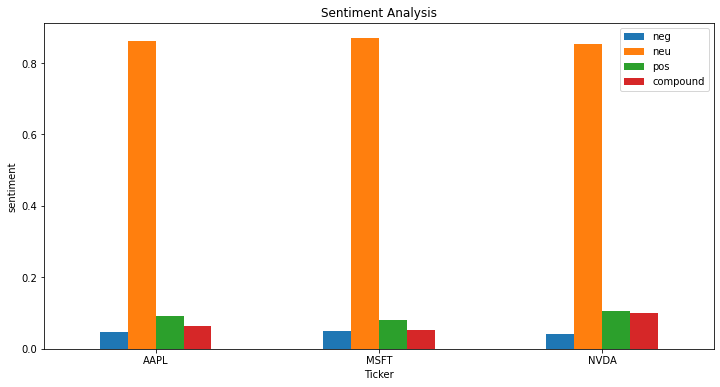

In [26]:
sentiment_combined.plot.bar(figsize=(12,6),title='Sentiment Analysis',ylabel='sentiment', rot=0)